In [1]:
import gooseberry as gs

import jax.numpy as jnp
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

from functools import partial

plt.style.use("./style.mplstyle")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [18]:
Ni = 5
Nh = 7
No = 10

xis = []
runs = 500000
for run in range(runs):
    xi1 = np.random.normal(0., 0.5, (Nh, Ni))
    xis.append(xi1 @ xi1.T)

print(np.round(np.mean(xis, axis=0), 2))

[[ 1.25  0.   -0.   -0.    0.   -0.    0.  ]
 [ 0.    1.25 -0.    0.   -0.   -0.   -0.  ]
 [-0.   -0.    1.25  0.    0.   -0.    0.  ]
 [-0.    0.    0.    1.25 -0.    0.    0.  ]
 [ 0.   -0.    0.   -0.    1.25 -0.    0.  ]
 [-0.   -0.   -0.    0.   -0.    1.25 -0.  ]
 [ 0.   -0.    0.    0.    0.   -0.    1.25]]


In [19]:
0.5**2 * Ni

1.25

In [21]:
Ni = 5
Nh = 7
No = 10

xis = []
vs = []
runs = 500000
for run in range(runs):
    xi1 = np.random.normal(0., 0.5, (Nh, Ni))
    xi2 = np.random.normal(0., 0.5, (No, Nh))
    xis.append(xi1.T @ xi2.T @ xi2 @ xi1)
    vs.append(np.mean(x2.T @ x2) @)

print(np.round(np.mean(xis, axis=0), 2))

[[ 4.37 -0.   -0.   -0.    0.  ]
 [-0.    4.38  0.    0.   -0.  ]
 [-0.    0.    4.38  0.   -0.01]
 [-0.    0.    0.    4.38  0.  ]
 [ 0.   -0.   -0.01  0.    4.38]]


In [35]:
(xi1@xi1.T).shape

(7, 7)

In [25]:
np.round(xi1.T @ xi2.T @ xi2 @ xi1, 1)

array([[ 5.8,  0.8, -1.1, -4.7, -4.5],
       [ 0.8,  0.7, -0.1, -0.8, -1. ],
       [-1.1, -0.1,  1. ,  0.2,  1. ],
       [-4.7, -0.8,  0.2,  5.3,  3. ],
       [-4.5, -1. ,  1. ,  3. ,  6.2]])

In [33]:
xi1[:, [0]].T @ xi2.T @ xi2 @ xi1[:, [0]]

array([[5.80684647]])

In [22]:
print(Nh * 0.5**2 * No * 0.5**2)

4.375


In [2]:
class FlatHierarchy(gs.datasets.Dataset):
    def __new__(cls, items_n=4, pre=None):
        items_n = 4
        gs.environment.add_dataset(items_n)
        training_data = partial(cls.training_data, items_n=items_n)
        return super().__new__(cls, training_data, training_data, training_data, pre)
    
    @staticmethod
    def training_data(rng_key, items_n):
        x = np.sqrt(items_n) * jnp.eye(items_n)
        
        y = jnp.asarray([
            [1., 1., 1., 1.],
            [1., 1., 0., 0.],
            [0., 0., 1., 1.],
            [1., 0., 0., 0.],
            [0., 1., 0., 0.],
            [0., 0., 1., 0.],
            [0., 0., 0., 1.]
        ]) # * jnp.asarray([4., 2., 2., 1., 1., 1., 1.]).reshape((1, 7, 1))
        
        return x, y

Text(0, 0.5, 'Properties')

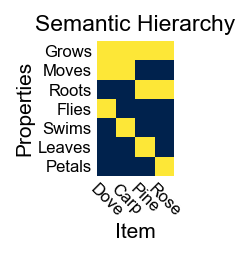

In [3]:
_, y = FlatHierarchy.training_data(None, 4)

fig, ax = plt.subplots()
ax.imshow(y)
ax.spines[['left', 'bottom']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=8, size=0, width=0)

ax.set_xticks(range(4))
ax.set_xticklabels(["Dove", "Carp", "Pine", "Rose"], rotation=-45, )
ax.set_yticks(range(7))
ax.set_yticklabels(["Grows", "Moves", "Roots", "Flys", "Swims", "Leaves", "Petals"])
ax.set_title("Semantic Hierarchy")
ax.set_xlabel("Item")
ax.set_ylabel("Properties")

Text(0, 0.5, 'Properties')

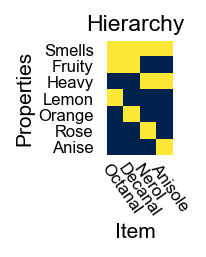

In [4]:
_, y = FlatHierarchy.training_data(None, 4)

fig, ax = plt.subplots()
ax.imshow(y)
ax.spines[['left', 'bottom']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=8, size=0, width=0)

ax.set_xticks(range(-1, 3))
ax.set_xticklabels(["Octanal", "Decanal", "Nerol  ", "Anisole"], rotation=-55, ha="left")
ax.set_yticks(range(7))
ax.set_yticklabels(["Smells", "Fruity", "Heavy", "Lemon", "Orange", "Rose", "Anise"])
ax.set_title("Hierarchy")
ax.set_xlabel("Item")
ax.set_ylabel("Properties")

Text(0, 0.5, 'Properties')

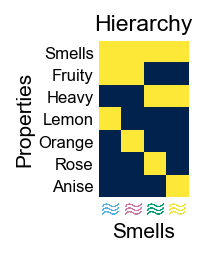

In [5]:
_, y = FlatHierarchy.training_data(None, 4)

fig, ax = plt.subplots()
ax.imshow(y)
ax.spines[['left', 'bottom']].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=8, size=0, width=0)

imgs = [
    plt.imread("./figures/2/smell-blue.png"),
    plt.imread("./figures/2/smell-pink.png"),
    plt.imread("./figures/2/smell-green.png"),
    plt.imread("./figures/2/smell-yellow.png")
]

ax.set_xticks(range(4))
ax.set_xticklabels([""] * 4)
labels = ax.xaxis.get_ticklabels()

for i, img in enumerate(imgs):
    oi = OffsetImage(img, zoom=0.04)
    oi.image.axes = ax
    ab = AnnotationBbox(oi, labels[i].get_position(), frameon=False, box_alignment=(0.45, 14.2))
    ax.add_artist(ab)

ax.set_yticks(range(7))
ax.set_yticklabels(["Smells", "Fruity", "Heavy", "Lemon", "Orange", "Rose", "Anise"])
ax.set_title("Hierarchy")
ax.set_xlabel("Smells", labelpad=10.)
ax.set_ylabel("Properties")

Text(0, 0.5, 'Y Position')

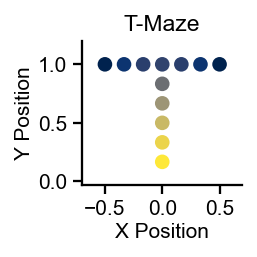

In [6]:
import jax
_, targets = gs.datasets.TMaze.training_data(jax.random.PRNGKey(0), 6, 3)
x, y = targets

t_color = np.cos(np.sqrt(x**2 + y**2))

fig, ax = plt.subplots()
ax.scatter(x, y, c=t_color)
ax.set_xlim(np.min(x) - 0.2, np.max(x) + 0.2)
ax.set_ylim(np.min(y) -0.2, np.max(y) + .2)
ax.set_title("T-Maze")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")

In [7]:
hidden_dim = 64
training_steps = 15000
learning_rate = 0.05

input_dims = [8, 12]
datasets = [
    partial(FlatHierarchy, items_n=4),
    partial(gs.datasets.TMaze, trunk_length=6, arm_length=3)
]
output_dims = [7, 2]

stds = [0.0001, 5.]

all_losses = []
hs = []

for (dataset, in_dim, out_dim) in zip(datasets, input_dims, output_dims):
    for std in stds:
        gs.reset()
        
        d = dataset()
        task = gs.tasks.FullBatchLearning(d)
        optimiser = gs.GradientDescent(learning_rate)
        loss = gs.MeanSquaredError()
    
        network = gs.Network([
            gs.Linear(hidden_dim, bias=False, weight_init=gs.init.Normal(std=std / in_dim)),
            gs.Linear(out_dim, bias=False, weight_init=gs.init.Normal(std=std / hidden_dim))
        ])
        
        trainer = gs.Trainer(task, network, loss, optimiser)
        state, params, train, validate, test = gs.environment.assemble(trainer)
        
        # Training
        losses = np.zeros(training_steps)
        for step in range(training_steps):
            state, params, losses[step] = train(state, params)

        all_losses.append(losses)
        
        xs, ys = train._fun.keywords["task"].keywords["dataset"].keywords["data"]
        hs.append(params["network"]["layer-0"]["w"] @ xs[0])

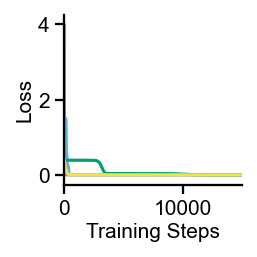

In [8]:
fig, ax = plt.subplots()
for i in range(4):
    ax.plot(all_losses[i])
    ax.set_xlabel("Training Steps")
    ax.set_ylabel("Loss")

In [9]:
mdss = []

for i in range(4):
    mds_transform = MDS(n_components=2, normalized_stress="auto", random_state=1, eps=1e-8)
    mdss.append(mds_transform.fit_transform(hs[i][0].T).T)

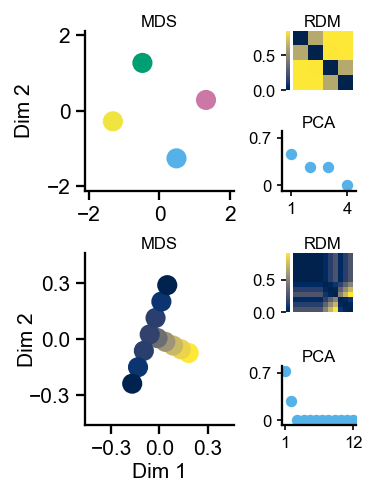

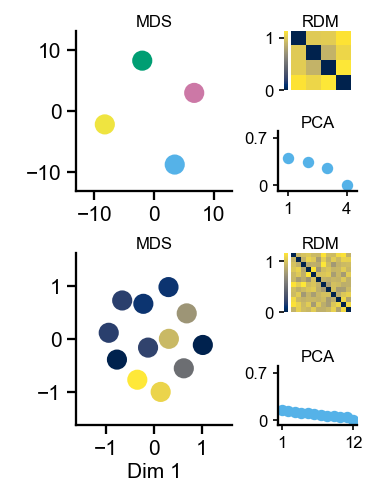

In [10]:
for i, (title, mds) in enumerate(zip(["Rich", "Lazy"], [mdss[::2], mdss[1::2]])):
    fig = plt.figure(figsize=(1.6 * 1.5, 1.6 * 2))

    for j, (x, y) in enumerate(mds):
        axs_1 = plt.subplot2grid((4, 3), (j*2, 0), colspan=2, rowspan=2)
        axs_2 = plt.subplot2grid((4, 3), (j*2, 2), colspan=1, rowspan=1)
        axs_3 = plt.subplot2grid((4, 3), (j*2 + 1, 2), colspan=1, rowspan=1)
        axs = [axs_1, axs_2, axs_3]

        if j == 0:
            color = colors[:4]
        else:
            color = t_color
        
        axs[0].scatter(x, y, c=color, s=75)
        
        lim = np.max(mds[j]) * 1.6
        axs[0].set_xlim(-lim, lim)
        axs[0].set_ylim(-lim, lim)
        
        axs[0].set_title("MDS", fontsize=8, pad=2.)
        
        if j == 1:
            axs[0].set_xlabel("Dim 1")
        axs[0].set_ylabel("Dim 2" if i == 0 else " ", labelpad=6. if (i == 0 and j == 0) else -4.)
        
        if i == 0 and j == 1:
            lim = 0.3
            axs[0].set_xticks([-lim, 0., lim])
            axs[0].set_yticks([-lim, 0., lim])
        
        cbar = axs[1].imshow(1. - np.corrcoef(hs[j*2 + i][0].T))
        
        divider = make_axes_locatable(axs[1])
        cax = divider.new_horizontal(size="7%", pad=0.02, pack_start=True)
        fig.add_axes(cax)
        cbar = fig.colorbar(cbar, cax=cax)
        cbar.outline.set_visible(False)
        cbar.ax.yaxis.tick_left()
        cbar.ax.tick_params(axis='y', which='major', labelsize=8, size=2.6, width=0.8)
        
        axs[1].set_xticks([])
        axs[1].set_yticks([])
        axs[1].set_title("RDM", fontsize=8, pad=2)
        axs[1].spines[['left', 'bottom']].set_visible(False)
        
        lmd = PCA().fit(hs[j*2 + i][0].T).explained_variance_ratio_
        axs[2].scatter(range(len(lmd)), lmd, s=20)
        axs[2].set_xlim(-0.5, len(lmd) - 0.5)
        axs[2].set_ylim(-0.075, 0.8)
        axs[2].set_xticks([0, len(lmd)-1])
        axs[2].set_xticklabels([1, len(lmd)])
        axs[2].set_yticks([0, 0.7])
        axs[2].set_yticklabels([0, 0.7])
        axs[2].set_title("PCA", fontsize=8, pad=2)
        axs[2].tick_params(axis='both', which='major', labelsize=8, size=2.6, width=0.8)

Text(0.5, 0, '$\\sigma^2$')

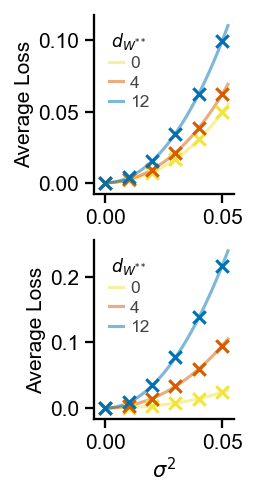

In [12]:
np.random.seed(1)

networks_n = 2000

hidden_dim = 64
training_steps = 5000
learning_rate = 0.05

input_dims = [8, 12]
datasets = [
    partial(FlatHierarchy, items_n=4),
    partial(gs.datasets.TMaze, trunk_length=6, arm_length=3, pre=[gs.datasets.Orthonormal()])
]
output_dims = [7, 2]


max_noise_std = 0.05

fig, axs = plt.subplots(2, 1, figsize=(1.6, 1.6*2))

for i, (dataset, in_dim, out_dim) in enumerate(zip(datasets, input_dims, output_dims)):
    gs.reset()

    d = dataset()
    task = gs.tasks.FullBatchLearning(d)
    optimiser = gs.GradientDescent(0.)
    loss = gs.MeanSquaredError()

    network = gs.Network([
        gs.Linear(hidden_dim, bias=False, weight_init=gs.init.Constant(0.)),
        gs.Linear(out_dim, bias=False, weight_init=gs.init.Constant(0.))
    ])

    trainer = gs.Trainer(task, network, loss, optimiser)
    state, params, train, validate, test = gs.environment.assemble(trainer, network_seeds_n=networks_n)

    xs, ys = train.keywords["task"].keywords["dataset"].keywords["data"]

    u, s, vt = np.linalg.svd(1. / xs.shape[-1] * ys[0] @ xs[0].T, False)
    r = np.linalg.svd(np.random.normal(0., 1., (hidden_dim, len(s))), False)[0]
    
    w1_ = r @ np.diag(np.sqrt(s)) @ vt
    w2_ = u @ np.diag(np.sqrt(s)) @ r.T
    
    
    std_1, std_2 = (0.215, 0.284) if i == 0 else (0.3, 0.488)
    qs = [
        r.T,
        np.random.normal(0., std_1, r.T.shape),
        np.random.normal(0., std_2, r.T.shape)
    ]
    
    for j, q in enumerate(qs):
        res = []
        for std in np.linspace(0., max_noise_std, 6):
            w1 = np.tile(np.linalg.pinv(q) @ np.diag(np.sqrt(s)) @ vt, (networks_n, 1, 1))
            w2 = np.tile(u @ np.diag(np.sqrt(s)) @ q, (networks_n, 1, 1))

            xi_1 = np.random.normal(0., std, w1.shape)
            xi_2 = np.random.normal(0., std, w2.shape)
            params["network"]["layer-0"]["w"] = w1 + xi_1
            params["network"]["layer-1"]["w"] = w2 + xi_2
            
            res.append(np.mean(train(state, params)[2]))

        axs[i].scatter(np.linspace(0., max_noise_std, 6), res, c=colors[3+j], marker="x", zorder=3)

        losses = []
        w1 = w1[0]
        w2 = w2[0]
        for std in np.linspace(0., max_noise_std*1.05, 100):
            c = xs.shape[-1] * hidden_dim * std**2 * out_dim * std**2
            loss = xs.shape[-1] * std**2 * np.trace(w2.T @ w2) + out_dim * std**2 * np.trace(w1.T @ w1) + c
            losses.append(0.5 * loss)
        
        dist = 0
        for w_, w in zip([w1_, w2_], [w1, w2]):
            dist += np.linalg.norm(w, ord="fro")**2 - np.linalg.norm(w_, ord="fro")**2
        dist = int(np.round(dist))
        
        axs[i].plot(np.linspace(0., max_noise_std*1.05, 100), losses, c=colors[3+j], alpha=0.5, label=dist, zorder=2)
        axs[i].set_xlim(-0.005, 0.05*1.1025)
    axs[i].legend(title="$d_{W^{**}}$")
    axs[i].set_ylabel("Average Loss")
    
axs[1].set_xlabel("$\\sigma^2$")

In [15]:
x1 = np.zeros(8)
x1[2] = np.sqrt(2)**-1
x1[4] = -np.sqrt(2)**-1

x2 = np.zeros(8)
x2[2] = np.sqrt(2)**-1
x2[6] = -np.sqrt(2)**-1


x1.T @ x2

0.4999999999999999

In [16]:
np.sqrt(2)**-1

0.7071067811865475

In [17]:
np.sqrt(0.5)

0.7071067811865476

[[2.5 0.5 1.  0.1 0.8 0.2 0.9 0. ]
 [0.5 2.5 0.  0.9 0.2 0.8 0.1 1. ]
 [1.  0.  1.  0.  0.  0.  0.  0. ]
 [0.1 0.9 0.  1.  0.  0.  0.  0. ]
 [0.8 0.2 0.  0.  1.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  1.  0.  0. ]
 [0.9 0.1 0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  1. ]]
[[-1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]
[[-1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]


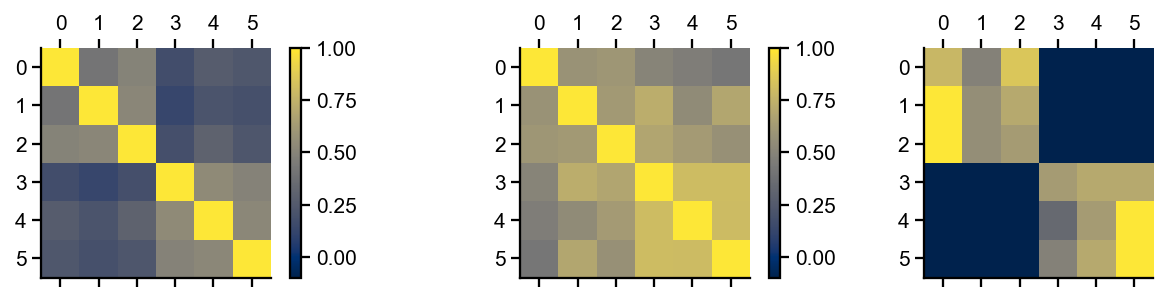

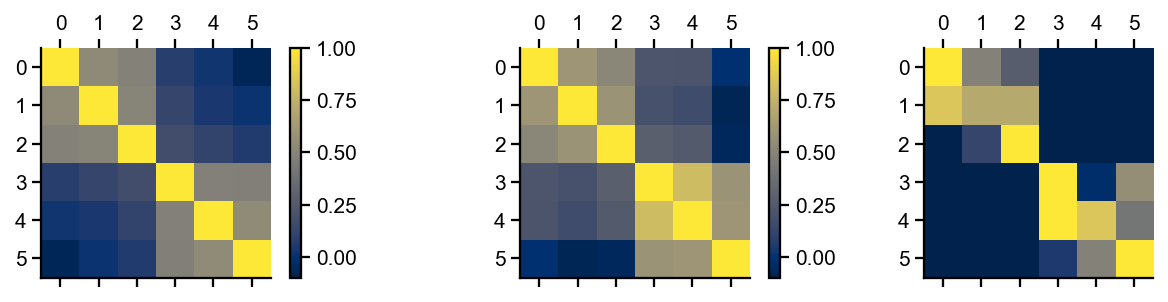

In [4]:
class MouseModel:
    def __init__(self):
        pass
    
    def train(self, xs, ys, hdim, independent_units, noise_std):
        self.xs = xs
        self.ys = ys
        self.independent_units = independent_units
        self.noise_std = noise_std
        
        sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
        u, s, vt = np.linalg.svd(sigma_yx, False)
        r = np.linalg.svd(np.random.normal(0., 1, (hdim, hdim)))[0][:, :2]
        self.w1 = r @ np.sqrt(np.diag(s)) @ vt
    
    def get_hs(self):
        hs = self.w1 @ self.xs
        return hs + np.random.normal(0., self.noise_std, hs.shape)

    
def lda(mouse_model, n_train, n_test):
    hs = np.hstack([mouse_model.get_hs() for _ in range(n_train)])
    y_label = np.hstack([range(mouse_model.xs.shape[-1]) for _ in range(n_train)])
    
    model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
    model.fit(hs.T, y_label)
    
    hs = np.hstack([mouse_model.get_hs() for _ in range(n_test)])
    y_pred = model.predict(hs.T)
    y_label = np.hstack([range(mouse_model.xs.shape[-1]) for _ in range(n_test)])

    return confusion_matrix(y_label, y_pred) / n_test
    

np.random.seed(1)

hidden_dim = 14
independent_units = 0
train_n = 300
test_n = 50

ys = np.ones((2, 6))
ys[0, :3] = -1.

# 5 Boundary Task
noise = 0.

xs = np.stack([
    [100., 10., 80., 20., 90., 0.],
    [0., 90., 20., 80., 10., 100.]
]) / 100.

xs = np.vstack([xs, np.identity(6)])

print(xs @ xs.T)

w1 = ys @ xs.T @np.linalg.pinv(xs @ xs.T)
print(w1 @ xs)
print(ys)


mm = MouseModel()
mm.train(xs, ys, hidden_dim, independent_units, noise)

ccs = 0.
for i in range(20):
    ccs += np.corrcoef(mm.get_hs(), rowvar=False)
ccs /= 20.

fig, axs = plt.subplots(1, 3, figsize=(9, 1.9))
ax = axs[0].matshow(ccs, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

data = """1	0.581592832382913	0.602433971357336	0.504840667890564	0.463333749957928	0.422423926082791
0.581592832382913	1	0.620445401435432	0.726100838220784	0.543012033046722	0.686335631336302
0.602433971357336	0.620445401435432	1	0.684040293578531	0.627773342116505	0.574019286686814
0.504840667890564	0.726100838220784	0.684040293578531	1	0.79873577254681	0.799957264274821
0.463333749957928	0.543012033046722	0.627773342116505	0.79873577254681	1	0.796405860575466
0.422423926082791	0.686335631336302	0.574019286686814	0.799957264274821	0.796405860575466	1"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = axs[1].matshow(data, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

cm = lda(mm, train_n, test_n)
axs[2].matshow(cm, vmin=0.1, vmax=0.4)


# 1 Boundary Task
noise = 0.

xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.]
]) / 100.


mm = MouseModel()
mm.train(xs, ys, hidden_dim, independent_units, noise)

ccs = 0.
for i in range(50):
    ccs += np.corrcoef(mm.get_hs(), rowvar=False)
ccs /= 50.

fig, axs = plt.subplots(1, 3, figsize=(9, 1.9))
ax = axs[0].matshow(ccs, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

data = """1	0.599732106435705	0.522830034223153	0.222045427182833	0.217830018729568	-0.0133054392856377
0.599732106435705	1	0.586233215059026	0.193229554683793	0.162414725385535	-0.0765674151896875
0.522830034223153	0.586233215059026	1	0.286583262346625	0.251185421634389	-0.0594038234957483
0.222045427182833	0.193229554683793	0.286583262346625	1	0.802187780983927	0.587340754326303
0.217830018729568	0.162414725385535	0.251185421634389	0.802187780983927	1	0.600151353473822
-0.0133054392856377	-0.0765674151896875	-0.0594038234957483	0.587340754326303	0.600151353473822	1"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = axs[1].matshow(data, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

cm = lda(mm, train_n, test_n)
axs[2].matshow(cm , vmin=0.1, vmax=0.4)


In [8]:
mm.xs.shape[-1]

6

In [ ]:
FIT MOUSE MODEL TO NOISY INPUTS!

[[1.  0.1 0.8 0.2 0.9 0. ]
 [0.  0.9 0.2 0.8 0.1 1. ]]
[[-1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]
[[-0.4   0.32 -0.24  0.24 -0.32  0.4 ]
 [ 1.    1.    1.    1.    1.    1.  ]]

(7, 1800) (1800,)
[[1.  0.9 0.8 0.2 0.1 0. ]
 [0.  0.1 0.2 0.8 0.9 1. ]]
[[-1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]
[[-1.2  -0.96 -0.72  0.72  0.96  1.2 ]
 [ 1.    1.    1.    1.    1.    1.  ]]

(7, 1800) (1800,)


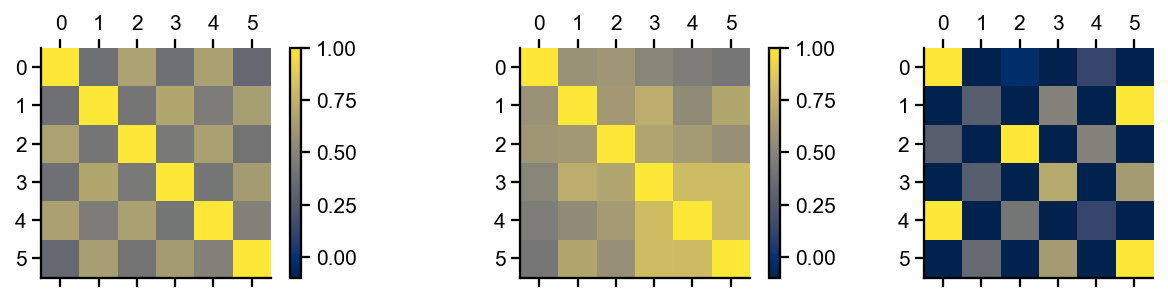

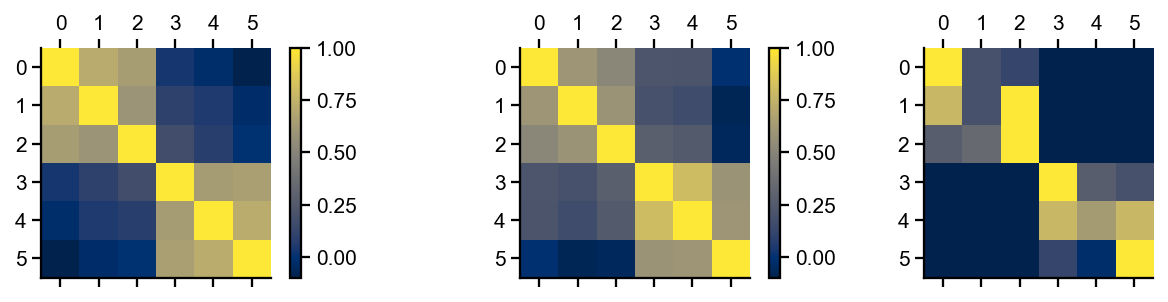

In [5]:
class MouseModel:
    def __init__(self):
        pass
    
    def train(self, xs, ys, hdim, independent_units, noise_std):
        self.xs = xs
        self.ys = ys
        self.independent_units = independent_units
        self.noise_std = noise_std
        
        sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
        u, s, vt = np.linalg.svd(sigma_yx, False)
        r = np.linalg.svd(np.random.normal(0., 1, (hdim, hdim)))[0][:, [0, 1]]
        self.w1 = r @ np.sqrt(np.diag(s)) @ vt
        
        print(xs)
        print(ys)
        print(sigma_yx @ xs)
        print()
    
    def get_hs(self):
        hs = self.w1 @ self.xs #  (self.xs + np.random.normal(0., self.noise_std, self.xs.shape))
        # hs = np.vstack([hs, np.random.normal(0., np.std(hs), (self.independent_units, xs.shape[-1]))])
        return hs + np.random.normal(0., self.noise_std, hs.shape)

    
def lda(mouse_model, n_train, n_test):
    hs = np.hstack([mouse_model.get_hs() for _ in range(n_train)])
    y_label = np.hstack([range(mouse_model.xs.shape[-1]) for _ in range(n_train)])
    
    print(hs.shape, y_label.shape)
    
    model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
    model.fit(hs.T, y_label)
    
    hs = np.hstack([mouse_model.get_hs() for _ in range(n_test)])
    y_pred = model.predict(hs.T)
    y_label = np.hstack([range(mouse_model.xs.shape[-1]) for _ in range(n_test)])

    return confusion_matrix(y_label, y_pred) / n_test
    

np.random.seed(1)

hidden_dim = 7
independent_units = 0
train_n = 300
test_n = 50

ys = np.ones((2, 6))
ys[0, :3] = -1.

# 5 Boundary Task
noise = 0.3

xs = np.stack([
    [100., 10., 80., 20., 90., 0.],
    [0., 90., 20., 80., 10., 100.],
]) / 100.

mm = MouseModel()
mm.train(xs, ys, hidden_dim, independent_units, noise)

ccs = 0.
for i in range(20):
    ccs += np.corrcoef(mm.get_hs(), rowvar=False)
ccs /= 20.

fig, axs = plt.subplots(1, 3, figsize=(9, 1.9))
ax = axs[0].matshow(ccs, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

data = """1	0.581592832382913	0.602433971357336	0.504840667890564	0.463333749957928	0.422423926082791
0.581592832382913	1	0.620445401435432	0.726100838220784	0.543012033046722	0.686335631336302
0.602433971357336	0.620445401435432	1	0.684040293578531	0.627773342116505	0.574019286686814
0.504840667890564	0.726100838220784	0.684040293578531	1	0.79873577254681	0.799957264274821
0.463333749957928	0.543012033046722	0.627773342116505	0.79873577254681	1	0.796405860575466
0.422423926082791	0.686335631336302	0.574019286686814	0.799957264274821	0.796405860575466	1"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = axs[1].matshow(data, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

cm = lda(mm, train_n, test_n)
axs[2].matshow(cm, vmin=0.1, vmax=0.4)


# 1 Boundary Task
noise = 0.3

xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.],
]) / 100.


mm = MouseModel()
mm.train(xs, ys, hidden_dim, independent_units, noise)

ccs = 0.
for i in range(50):
    ccs += np.corrcoef(mm.get_hs(), rowvar=False)
ccs /= 50.

fig, axs = plt.subplots(1, 3, figsize=(9, 1.9))
ax = axs[0].matshow(ccs, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

data = """1	0.599732106435705	0.522830034223153	0.222045427182833	0.217830018729568	-0.0133054392856377
0.599732106435705	1	0.586233215059026	0.193229554683793	0.162414725385535	-0.0765674151896875
0.522830034223153	0.586233215059026	1	0.286583262346625	0.251185421634389	-0.0594038234957483
0.222045427182833	0.193229554683793	0.286583262346625	1	0.802187780983927	0.587340754326303
0.217830018729568	0.162414725385535	0.251185421634389	0.802187780983927	1	0.600151353473822
-0.0133054392856377	-0.0765674151896875	-0.0594038234957483	0.587340754326303	0.600151353473822	1"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = axs[1].matshow(data, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

cm = lda(mm, train_n, test_n)
axs[2].matshow(cm , vmin=0.1, vmax=0.4)


In [3]:
import torch

xs = np.stack([
    [100., 10., 80., 20., 90., 0.],
    [0., 90., 20., 80., 10., 100.],
]) / 100.
xs = torch.tensor(xs).float().T

ys = np.ones((1, 6))
ys[0, :3] = -1.
ys = torch.tensor(ys).float().T

class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        l1 = torch.nn.Linear(2, 12)
        #torch.nn.init.normal_(l1.weight, 0., 0.001)
        #torch.nn.init.zeros_(l1.bias)
        
        l2 = torch.nn.Linear(12, 1)
        #torch.nn.init.normal_(l2.weight, 0., 0.001)
        #torch.nn.init.zeros_(l2.bias)
        
        self.l1 = l1
        self.l2 = l2
    
    def forward(self, x):
        return self.l2(torch.tanh(self.l1(x)))

    
m = Model()

loss_fnct = torch.nn.MSELoss()
optim = torch.optim.SGD(m.parameters(), lr=0.1)

losses = []
for i in range(50000):
    optim.zero_grad()
    y_hat = m(xs)
    loss = loss_fnct(y_hat, ys)
    loss.backward()
    optim.step()
    losses.append(loss.item())
    


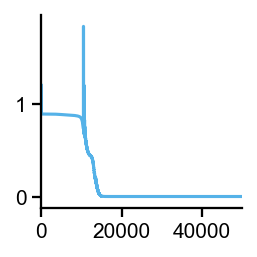

In [4]:
fig, ax = plt.subplots()
ax.plot(losses)

In [640]:
m(xs)

tensor([[-0.9998],
        [-1.0004],
        [-1.0000],
        [ 0.9996],
        [ 1.0001],
        [ 0.9994]], grad_fn=<AddmmBackward0>)

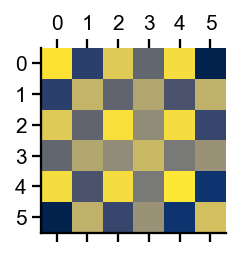

In [7]:
fig, ax = plt.subplots()
hs = torch.tanh_(m.l1.weight @ xs.T + m.l1.bias.reshape(12, 1))
hs = hs.detach().numpy()
ax.matshow(hs.T @ hs)

In [643]:
m.l1.weight.shape

torch.Size([12, 2])

In [644]:
xs.shape

torch.Size([6, 2])

[[1.   0.1  0.8  0.2  0.9  0.  ]
 [0.   0.9  0.2  0.8  0.1  1.  ]
 [0.01 0.01 0.01 0.01 0.01 0.01]]
[[-1. -1. -1.  1.  1.  1.]]
[[-0.4   0.32 -0.24  0.24 -0.32  0.4 ]]

[[1.   0.9  0.8  0.2  0.1  0.  ]
 [0.   0.1  0.2  0.8  0.9  1.  ]
 [0.01 0.01 0.01 0.01 0.01 0.01]]
[[-1. -1. -1.  1.  1.  1.]]
[[-1.2  -0.96 -0.72  0.72  0.96  1.2 ]]



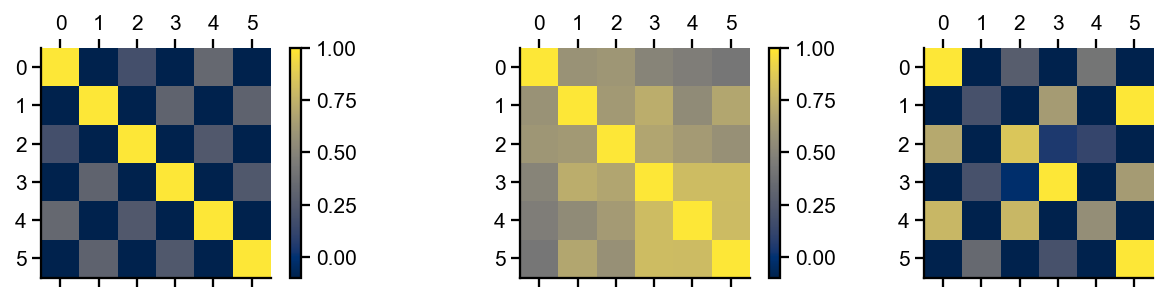

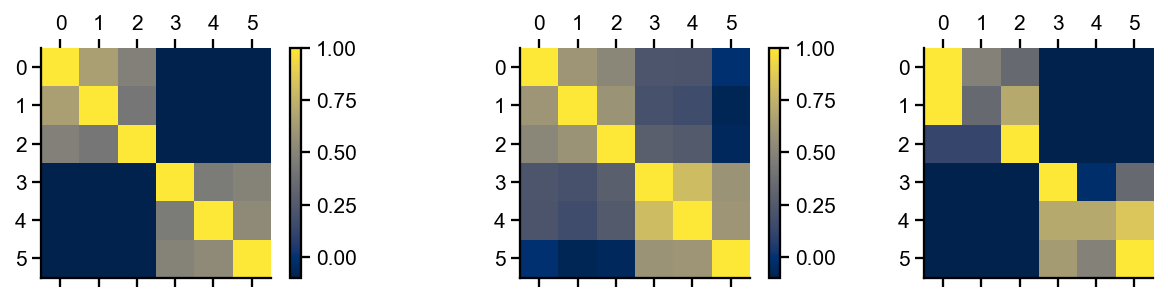

In [591]:
class MouseModel:
    def __init__(self):
        pass
    
    def train(self, xs, ys, hdim, independent_units, noise_std):
        self.xs = xs
        self.ys = ys
        self.independent_units = independent_units
        self.noise_std = noise_std
        
        sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
        u, s, vt = np.linalg.svd(sigma_yx, False)
        r = np.linalg.svd(np.random.normal(0., 1, (hdim, hdim)))[0][:, :1]
        self.w1 = r @ np.sqrt(np.diag(s)) @ vt
        
        print(xs)
        print(ys)
        print(sigma_yx @ xs)
        print()
    
    def get_hs(self):
        hs = self.w1 @ self.xs #  (self.xs + np.random.normal(0., self.noise_std, self.xs.shape))
        # hs = np.vstack([hs, np.random.normal(0., np.std(hs), (self.independent_units, xs.shape[-1]))])
        return hs + np.random.normal(0., self.noise_std, hs.shape)

    
def lda(mouse_model, n_train, n_test):
    hs = np.hstack([mouse_model.get_hs() for _ in range(n_train)])
    y_label = np.hstack([range(mouse_model.xs.shape[-1]) for _ in range(n_train)])
    
    model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
    model.fit(hs.T, y_label)
    
    hs = np.hstack([mouse_model.get_hs() for _ in range(n_test)])
    y_pred = model.predict(hs.T)
    y_label = np.hstack([range(mouse_model.xs.shape[-1]) for _ in range(n_test)])

    return confusion_matrix(y_label, y_pred) / n_test
    

np.random.seed(1)

hidden_dim = 7
independent_units = 0
train_n = 300
test_n = 50

ys = np.ones((1, 6))
ys[0, :3] = -1.

# 5 Boundary Task
noise = 0.3

xs = np.stack([
    [100., 10., 80., 20., 90., 0.],
    [0., 90., 20., 80., 10., 100.],
    [1., 1., 1., 1., 1., 1.],
]) / 100.

mm = MouseModel()
mm.train(xs, ys, hidden_dim, independent_units, noise)

ccs = 0.
for i in range(20):
    ccs += np.corrcoef(mm.get_hs(), rowvar=False)
ccs /= 20.

fig, axs = plt.subplots(1, 3, figsize=(9, 1.9))
ax = axs[0].matshow(ccs, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

data = """1	0.581592832382913	0.602433971357336	0.504840667890564	0.463333749957928	0.422423926082791
0.581592832382913	1	0.620445401435432	0.726100838220784	0.543012033046722	0.686335631336302
0.602433971357336	0.620445401435432	1	0.684040293578531	0.627773342116505	0.574019286686814
0.504840667890564	0.726100838220784	0.684040293578531	1	0.79873577254681	0.799957264274821
0.463333749957928	0.543012033046722	0.627773342116505	0.79873577254681	1	0.796405860575466
0.422423926082791	0.686335631336302	0.574019286686814	0.799957264274821	0.796405860575466	1"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = axs[1].matshow(data, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

cm = lda(mm, train_n, test_n)
axs[2].matshow(cm, vmin=0.1, vmax=0.4)


# 1 Boundary Task
noise = 0.3

xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.],
    [1., 1., 1., 1., 1., 1.],
]) / 100.


mm = MouseModel()
mm.train(xs, ys, hidden_dim, independent_units, noise)

ccs = 0.
for i in range(50):
    ccs += np.corrcoef(mm.get_hs(), rowvar=False)
ccs /= 50.

fig, axs = plt.subplots(1, 3, figsize=(9, 1.9))
ax = axs[0].matshow(ccs, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

data = """1	0.599732106435705	0.522830034223153	0.222045427182833	0.217830018729568	-0.0133054392856377
0.599732106435705	1	0.586233215059026	0.193229554683793	0.162414725385535	-0.0765674151896875
0.522830034223153	0.586233215059026	1	0.286583262346625	0.251185421634389	-0.0594038234957483
0.222045427182833	0.193229554683793	0.286583262346625	1	0.802187780983927	0.587340754326303
0.217830018729568	0.162414725385535	0.251185421634389	0.802187780983927	1	0.600151353473822
-0.0133054392856377	-0.0765674151896875	-0.0594038234957483	0.587340754326303	0.600151353473822	1"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)
ax = axs[1].matshow(data, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

cm = lda(mm, train_n, test_n)
axs[2].matshow(cm , vmin=0.1, vmax=0.4)


In [659]:
data = """1	0.599732106435705	0.522830034223153	0.222045427182833	0.217830018729568	-0.0133054392856377
0.599732106435705	1	0.586233215059026	0.193229554683793	0.162414725385535	-0.0765674151896875
0.522830034223153	0.586233215059026	1	0.286583262346625	0.251185421634389	-0.0594038234957483
0.222045427182833	0.193229554683793	0.286583262346625	1	0.802187780983927	0.587340754326303
0.217830018729568	0.162414725385535	0.251185421634389	0.802187780983927	1	0.600151353473822
-0.0133054392856377	-0.0765674151896875	-0.0594038234957483	0.587340754326303	0.600151353473822	1"""
data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)

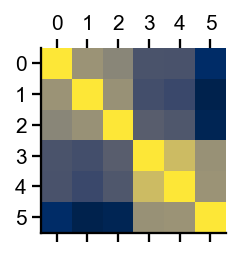

In [660]:
fig, ax = plt.subplots()
ax.matshow(data)

In [661]:
ys = np.ones((1, 6))
ys[:, :3] = -1




ws = ys @ data.T @ np.linalg.pinv(data @ data.T)

ws @ data

array([[-1., -1., -1.,  1.,  1.,  1.]])

In [ ]:

"""
def lda(mouse_model, n_train, n_test):
    cm = np.zeros((6, 6))
    
    for run in range(100):
        neurons = np.random.choice(14, 7, False)
        hs = np.hstack([mouse_model.get_hs()[neurons, :] for _ in range(n_train)])
        y_label = np.hstack([range(6) for _ in range(n_train)])

        model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
        model.fit(hs.T, y_label)

        hs = np.hstack([mouse_model.get_hs()[neurons, :] for _ in range(n_test)])
        y_pred = model.predict(hs.T)
        y_label = np.hstack([range(6) for _ in range(n_test)])

        cm += confusion_matrix(y_label, y_pred) / n_test

    return cm / 100.
"""

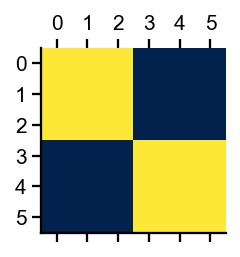

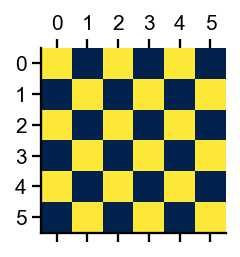

In [401]:
xs = np.identity(6)

ys = np.ones((2, 6))
ys[0, :3] = -1.

sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
u, s, vt = np.linalg.svd(sigma_yx, False)

w1 = np.sqrt(np.diag(s)) @ vt

fig, ax = plt.subplots()
ax.matshow(xs.T @ w1.T @ w1 @ xs)


ys = np.ones((2, 6))
ys[0, [1, 3, 5]] = -1.


sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
u, s, vt = np.linalg.svd(sigma_yx, False)

w1 = np.sqrt(np.diag(s)) @ vt

fig, ax = plt.subplots()
ax.matshow(xs.T @ w1.T @ w1 @ xs)

In [272]:
xs = np.zeros((6, 6))
xs[[0, 2, 4, 1, 3, 5], range(6)] = 1
xs

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

6

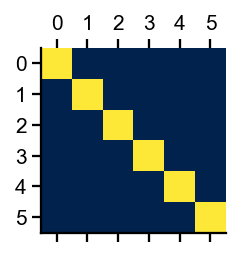

In [210]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

n = 100
hs = np.hstack([mm.get_hs(20, 0.025) for _ in range(n)])
y_label = np.hstack([range(6) for _ in range(n)])

model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
model.fit(hs.T, y_label)

n = 20
hs = np.hstack([mm.get_hs(20, 0.025) for _ in range(n)])
y_pred = model.predict(hs.T)
y_label = np.hstack([range(6) for _ in range(n)])

cm = confusion_matrix(y_label, y_pred)

fig, ax = plt.subplots()
ax.matshow(cm / n, vmin=0.1, vmax=0.4)

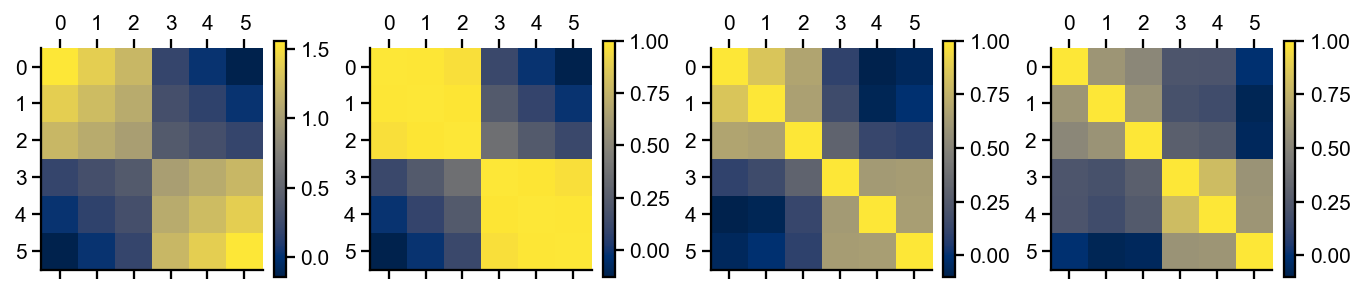

In [267]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.],
]) / 100.

#xs = np.identity(6)


ys = np.ones((2, 6))
ys[0, :3] = -1.

#ys = np.ones((2, 6))
#ys[0, :3] = -1.
#ys = np.vstack([
#    ys[[0], :],
#    np.identity(6)
#])

sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
u, s, vt = np.linalg.svd(sigma_yx, False)
r = np.linalg.svd(np.random.normal(0., 1, (7, 7)))[0][:, [0, 1]]
w1 = r @ np.sqrt(np.diag(s)) @ vt

fig, axs = plt.subplots(1, 4, figsize=(9, 1.9), constrained_layout=True)
ax = axs[0].matshow(xs.T @ w1.T @ w1 @ xs)
fig.colorbar(ax)

cc = np.corrcoef((w1 @ xs).T)

ax = axs[1].matshow(cc)
fig.colorbar(ax)

ccs = 0.
for i in range(10):
    ccs += np.corrcoef((w1 @ xs).T + np.random.normal(0., .3, (6, 7)))
ccs /= 10.
ax = axs[2].matshow(ccs, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

data = """1	0.599732106435705	0.522830034223153	0.222045427182833	0.217830018729568	-0.0133054392856377
0.599732106435705	1	0.586233215059026	0.193229554683793	0.162414725385535	-0.0765674151896875
0.522830034223153	0.586233215059026	1	0.286583262346625	0.251185421634389	-0.0594038234957483
0.222045427182833	0.193229554683793	0.286583262346625	1	0.802187780983927	0.587340754326303
0.217830018729568	0.162414725385535	0.251185421634389	0.802187780983927	1	0.600151353473822
-0.0133054392856377	-0.0765674151896875	-0.0594038234957483	0.587340754326303	0.600151353473822	1"""

data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)

ax = axs[3].matshow(data, vmin=-0.1, vmax=1.)
fig.colorbar(ax)

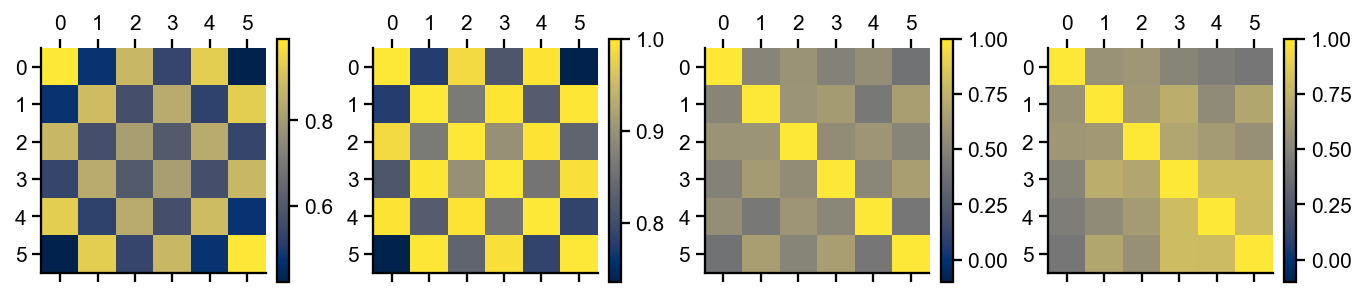

In [257]:
np.random.seed(0)

xs = np.stack([
    [100., 10., 80., 20., 90., 0.],
    [0., 90., 20., 80., 10., 100.],
]) / 100.

ys = np.ones((2, 6))
ys[0, :3] = -1.

#ys = np.ones((2, 6))
#ys[0, :3] = -1.
#ys = np.vstack([
#    ys[[0], :],
#    np.identity(6)
#])

sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
u, s, vt = np.linalg.svd(sigma_yx, False)
r = np.linalg.svd(np.random.normal(0., 1, (7, 7)))[0][:, [0, 1]]
w1 = r @ np.sqrt(np.diag(s)) @ vt

fig, axs = plt.subplots(1, 4, figsize=(9, 1.9), constrained_layout=True)

ax = axs[0].matshow(xs.T @ w1.T @ w1 @ xs)
fig.colorbar(ax)

cc = np.corrcoef((w1 @ xs).T)
ax = axs[1].matshow(cc)
fig.colorbar(ax)

ccs = 0.
for i in range(30):
    ccs += np.corrcoef((w1 @ xs).T + np.random.normal(0., .3, (6, 7)))
ccs /= 30.
ax = axs[2].matshow(ccs, vmin=-0.1, vmax=1.) # , vmin=0.42, vmax=1.
fig.colorbar(ax)

data = """1	0.581592832382913	0.602433971357336	0.504840667890564	0.463333749957928	0.422423926082791
0.581592832382913	1	0.620445401435432	0.726100838220784	0.543012033046722	0.686335631336302
0.602433971357336	0.620445401435432	1	0.684040293578531	0.627773342116505	0.574019286686814
0.504840667890564	0.726100838220784	0.684040293578531	1	0.79873577254681	0.799957264274821
0.463333749957928	0.543012033046722	0.627773342116505	0.79873577254681	1	0.796405860575466
0.422423926082791	0.686335631336302	0.574019286686814	0.799957264274821	0.796405860575466	1"""

data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)

ax = axs[3].matshow(data, vmin=-0.1, vmax=1.) # , vmin=-0.1, vmax=1.
fig.colorbar(ax)

(6000, 1, 7)
(6000,)


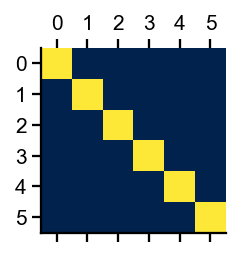

In [268]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

noise = 0.05
n = 1000

xs_ = np.asarray([(w1 @ xs[:, [item]]).T + np.random.normal(0., noise, (1, 7)) for item in range(6) for i in range(n)])
ys_ = np.asarray([item for item in range(6) for i in range(n)])

print(xs_.shape)
print(ys_.shape)

model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
model.fit(xs_.reshape(-1, 7), ys_)

n = 100
xs_ = np.asarray([(w1 @ xs[:, [item]]).T + np.random.normal(0., noise, (1, 7)) for item in range(6) for i in range(n)])
y_pred = model.predict(xs_.reshape(-1, 7))
y_label = np.asarray([item for item in range(6) for i in range(n)])

cm = confusion_matrix(y_label, y_pred)

fig, ax = plt.subplots()
ax.matshow(cm / n, vmin=0.1, vmax=0.4)

(600, 1, 7)

In [250]:
ys_.shape

(6000,)

In [122]:
np.var(w1 @ xs)

0.12537247569542467

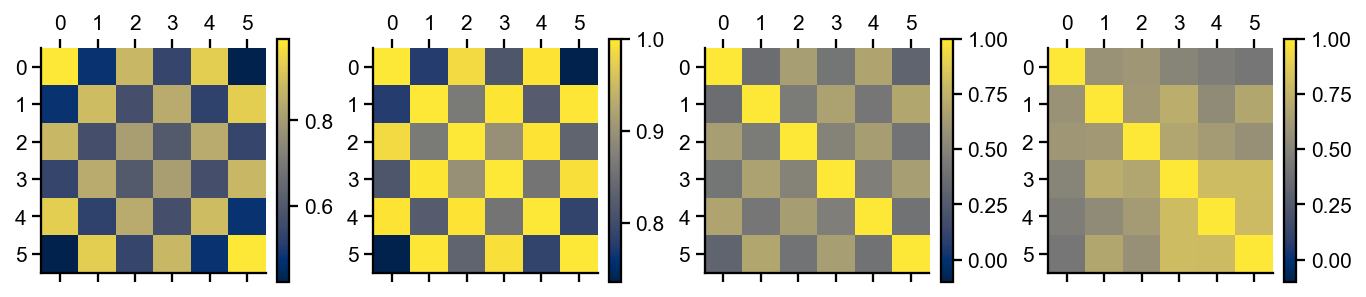

In [135]:
np.random.seed(0)

xs = np.stack([
    [100., 10., 80., 20., 90., 0.],
    [0., 90., 20., 80., 10., 100.],
]) / 100.

ys = np.ones((2, 6))
ys[0, :3] = -1.

sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
u, s, vt = np.linalg.svd(sigma_yx, False)
r = np.linalg.svd(np.random.normal(0., 1, (7, 7)))[0][:, [0, 1]]
w1 = r @ np.sqrt(np.diag(s)) @ vt

fig, axs = plt.subplots(1, 4, figsize=(9, 1.9), constrained_layout=True)

ax = axs[0].matshow(xs.T @ w1.T @ w1 @ xs)
fig.colorbar(ax)

cc = np.corrcoef((w1 @ xs).T)
ax = axs[1].matshow(cc)
fig.colorbar(ax)

ccs = 0.
for i in range(30):
    hs = np.vstack([w1 @ xs, np.random.normal(0., 0.125, (30, 6))])
    # hs += np.random.normal(0., .2, hs.shape)
    ccs += np.corrcoef(hs, rowvar=False)
ccs /= 30.
ax = axs[2].matshow(ccs, vmin=-0.1, vmax=1.) # , vmin=0.42, vmax=1.
fig.colorbar(ax)

data = """1	0.581592832382913	0.602433971357336	0.504840667890564	0.463333749957928	0.422423926082791
0.581592832382913	1	0.620445401435432	0.726100838220784	0.543012033046722	0.686335631336302
0.602433971357336	0.620445401435432	1	0.684040293578531	0.627773342116505	0.574019286686814
0.504840667890564	0.726100838220784	0.684040293578531	1	0.79873577254681	0.799957264274821
0.463333749957928	0.543012033046722	0.627773342116505	0.79873577254681	1	0.796405860575466
0.422423926082791	0.686335631336302	0.574019286686814	0.799957264274821	0.796405860575466	1"""

data = np.asarray([float(f) for f in data.replace("\t", " ").replace("\n", " ").split(" ")]).reshape(6, 6)

ax = axs[3].matshow(data, vmin=-0.1, vmax=1.) # , vmin=-0.1, vmax=1.
fig.colorbar(ax)

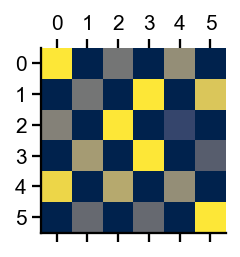

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

noise = 0.05
n = 150

xs_ = np.asarray([np.vstack([w1 @ xs[:, [item]], np.random.normal(0., 0.3, (4, 1))]) + np.random.normal(0., .2, (11, 1)) for item in range(6) for i in range(n)])
ys_ = np.asarray([item for item in range(6) for i in range(n)])

model = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")
model.fit(xs_.reshape(-1, 11), ys_)

n = 50
xs_ = np.asarray([np.vstack([w1 @ xs[:, [item]], np.random.normal(0., 0.3, (4, 1))]) + np.random.normal(0., .2, (11, 1)) for item in range(6) for i in range(n)])
y_pred = model.predict(xs_.reshape(-1, 11))
y_label = np.asarray([item for item in range(6) for i in range(n)])

cm = confusion_matrix(y_label, y_pred)

fig, ax = plt.subplots()
ax.matshow(cm / n, vmin=0.1, vmax=0.4)

In [ ]:
noise = 0.3
n = 150
xs_ = np.asarray([(w1 @ xs[:, [item]]).T + np.random.normal(0., noise, (1, 7)) for item in range(6) for i in range(n)])
ys_ = np.asarray([item for item in range(6) for i in range(n)])

for i in range(1000):
    

In [ ]:
np.random.seed(0)

xs = np.stack([
    [100., 10., 80., 20., 90., 0.],
    [0., 90., 20., 80., 10., 100.],
]) / 100.

ys = np.ones((2, 6))
ys[0, :3] = -1.

#ys = np.ones((2, 6))
#ys[0, :3] = -1.
#ys = np.vstack([
#    ys[[0], :],
#    np.identity(6)
#])

sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)
u, s, vt = np.linalg.svd(sigma_yx, False)
r = np.linalg.svd(np.random.normal(0., 1, (7, 7)))[0][:, [0, 1]]
w1 = r @ np.sqrt(np.diag(s)) @ vt

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

n = 200
xs_ = np.asarray([w1 @ (xs[:, [item]] + np.random.normal(0., 1.3, (2, 1))) for item in range(6) for i in range(n)])
ys_ = np.asarray([item for item in range(6) for i in range(n)])

model = LinearDiscriminantAnalysis()
model.fit(xs_.reshape(-1, 7), ys_)

LinearDiscriminantAnalysis()

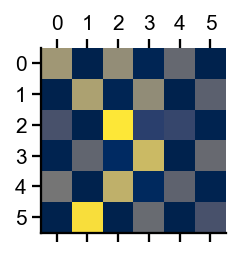

In [34]:
xs_ = np.asarray([w1 @ (xs[:, [item]] + np.random.normal(0., .3, (2, 1))) for item in range(6) for i in range(n)])
y_pred = model.predict(xs_.reshape(-1, 7))
y_label = np.asarray([item for item in range(6) for i in range(n)])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_label, y_pred)

fig, ax = plt.subplots()
ax.matshow(cm)

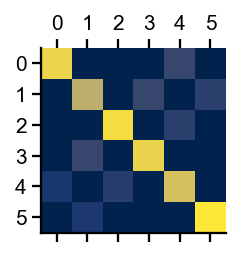

In [38]:
cm / 100.

array([[0.61, 0.  , 0.1 , 0.  , 0.29, 0.  ],
       [0.  , 0.47, 0.  , 0.31, 0.  , 0.22],
       [0.08, 0.  , 0.69, 0.  , 0.23, 0.  ],
       [0.  , 0.3 , 0.  , 0.65, 0.  , 0.05],
       [0.3 , 0.  , 0.3 , 0.  , 0.4 , 0.  ],
       [0.  , 0.25, 0.  , 0.01, 0.  , 0.74]])

In [593]:
xs

array([[1. , 0.1, 0.8, 0.2, 0.9, 0. ],
       [0. , 0.9, 0.2, 0.8, 0.1, 1. ]])

In [374]:
ys

array([[-0.6,  1. , -0.6,  1. , -0.6,  1. ]])

In [375]:
xs

array([[1. , 0.9, 0.8, 0.2, 0.1, 0. ],
       [0. , 0.1, 0.2, 0.8, 0.9, 1. ]])

In [ ]:
h = w1 @ xs
w @ h - np.identity(6)

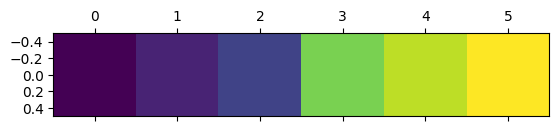

In [361]:
fig, ax = plt.subplots()
ax.matshow(sigma_yx @ xs)

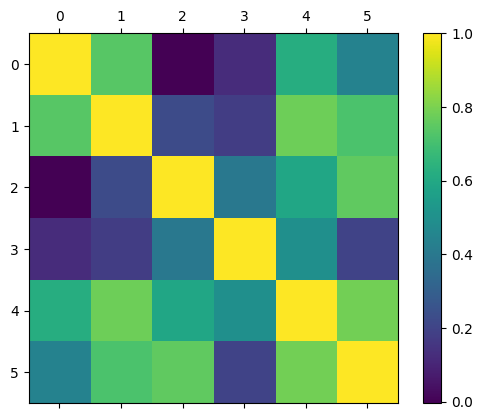

In [176]:
np.random.seed(1)

r = np.linalg.svd(np.random.normal(0., 1, (7, 7)))[0][:, [0, 1]]
# r = np.random.normal(0., 1., (7, 1))
cc = np.corrcoef((r @ w1 @ xs).T + np.random.normal(0., 3.9, (6, 7)))

fig, ax = plt.subplots()
ax = ax.matshow(cc)
fig.colorbar(ax)

(6, 1) (6, 2)


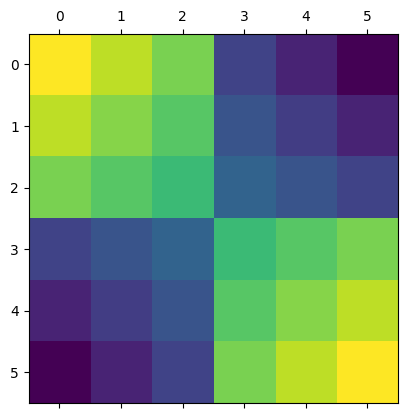

In [185]:
xs = np.stack([
    [100., 90., 80., 20., 10., 0.],
    [0., 10., 20., 80., 90., 100.],
])

xs -= np.mean(xs)

ys = np.ones((1, 6))
ys[:, 0] = -.2
ys[:, 2] = -.2
ys[:, 4] = -.2
ys[:, 1] = 1.
ys[:, 3] = 1.
ys[:, 5] = 1.

sigma_yx = ys @ xs.T @ np.linalg.pinv(xs @ xs.T)

u, s, vt = np.linalg.svd(sigma_yx, False)

w1 = np.sqrt(np.diag(s)) @ vt

print(ys.T.shape, xs.T.shape)


fig, ax = plt.subplots()
ax.matshow(xs.T @ w1.T @ w1 @ xs)

In [182]:
ys

array([[-0.2,  1. , -0.2,  1. , -0.2,  1. ]])

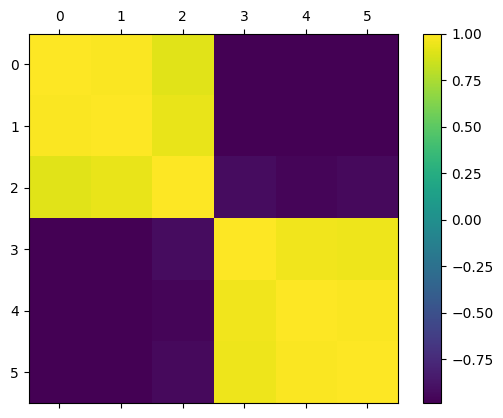

In [188]:
np.random.seed(1)

r = np.linalg.svd(np.random.normal(0., 1, (7, 7)))[0][:, :1]
# r = np.random.normal(0., 1., (7, 1))
cc = np.corrcoef((r @ w1 @ xs).T + np.random.normal(0., .3, (6, 7)))

fig, ax = plt.subplots()
ax = ax.matshow(cc)
fig.colorbar(ax)

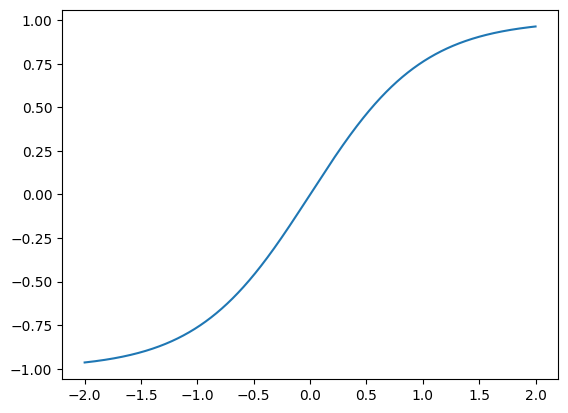

In [100]:
xs = np.linspace(-2, 2, 1000)
fig, ax = plt.subplots()
ax.plot(xs, np.tanh(xs))

In [37]:
np.corrcoef(np.random.normal(0., 1., (2, 3)))

array([[ 1.        , -0.62264654],
       [-0.62264654,  1.        ]])

In [38]:
w1.shape

(1, 2)

In [39]:
r.shape

(7, 1)

In [ ]:
np.random.seed(1)
i1 = np.diag(np.random.normal(0., 1., 5))
i2 = np.diag(np.random.normal(0., 1., 5))
n = np.linalg.svd(np.random.normal(0., 1., (5, 5)))

In [47]:
np.random.seed(1)

in_dim = 5
hidden_dim = 6
out_dim = 7

a = 0.3
I = np.identity(hidden_dim)

w1 = np.random.normal(0., 1., (hidden_dim, in_dim))

print(np.round(w1.T@(a * I)@w1, 2))
print(np.round(a*w1.T@w1, 2))



[[ 3.89 -2.7   0.31 -1.04  0.49]
 [-2.7   2.71  0.29  0.78 -0.73]
 [ 0.31  0.29  1.03  0.33 -0.25]
 [-1.04  0.78  0.33  0.52 -0.33]
 [ 0.49 -0.73 -0.25 -0.33  1.06]]
[[ 3.89 -2.7   0.31 -1.04  0.49]
 [-2.7   2.71  0.29  0.78 -0.73]
 [ 0.31  0.29  1.03  0.33 -0.25]
 [-1.04  0.78  0.33  0.52 -0.33]
 [ 0.49 -0.73 -0.25 -0.33  1.06]]


In [84]:
import numpy as np

u, s, vt = np.linalg.svd(np.random.normal(0., 1., (5, 3)), False)
v = vt.T

print(np.round(u.T@u, 2))
print(np.round(u@u.T, 2))
print(np.round(v.T@v, 2))
print(np.round(v@v.T, 2))

[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]
[[ 0.92 -0.   -0.17 -0.13 -0.17]
 [-0.    0.34 -0.19 -0.25  0.36]
 [-0.17 -0.19  0.59 -0.33 -0.26]
 [-0.13 -0.25 -0.33  0.72 -0.13]
 [-0.17  0.36 -0.26 -0.13  0.43]]
[[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


In [67]:
np.random.seed(1)

n = 3
in_dim = 5
hidden_dim = 6
out_dim = 7

xs = np.sqrt(n) * np.linalg.svd(np.random.normal(0., 1., (in_dim, n)), False)[0]
ys = np.random.normal(0., 1., (out_dim, n))

u, s, vt = np.linalg.svd(1. / n * ys @ xs.T, False)
q = 10. * np.random.normal(0., 1., (hidden_dim, len(s)))

w1 = q @ np.diag(np.sqrt(s)) @ vt

print(np.round(s, 2))

u, s, vt = np.linalg.svd(w1)

print(np.round(s))


[1.49 0.94 0.69 0.   0.  ]
[33. 24. 11.  0.  0.]


In [62]:
1. / n * ys @ xs.T

array([[-0.12348565, -0.76970296,  0.18245134, -0.06576667,  0.15728148],
       [ 0.05747321, -0.38823521,  0.2208705 ,  0.54105617, -0.14849492],
       [ 0.35473781,  0.66836582,  0.0624544 ,  0.34348985, -0.31222104],
       [-0.36513632,  0.27466369, -0.39455476,  0.25871605,  0.00190209],
       [ 0.04844523, -0.16519876,  0.0731266 , -0.58026295,  0.19462348],
       [-0.21540385, -0.54681282,  0.02382897, -0.03272757,  0.14931879],
       [-0.20737424, -0.3550679 , -0.05974116, -0.39629673,  0.2422204 ]])

In [64]:
1. / n * ys @ xs.T @ (1. / n * xs @ xs.T)

array([[-0.12348565, -0.76970296,  0.18245134, -0.06576667,  0.15728148],
       [ 0.05747321, -0.38823521,  0.2208705 ,  0.54105617, -0.14849492],
       [ 0.35473781,  0.66836582,  0.0624544 ,  0.34348985, -0.31222104],
       [-0.36513632,  0.27466369, -0.39455476,  0.25871605,  0.00190209],
       [ 0.04844523, -0.16519876,  0.0731266 , -0.58026295,  0.19462348],
       [-0.21540385, -0.54681282,  0.02382897, -0.03272757,  0.14931879],
       [-0.20737424, -0.3550679 , -0.05974116, -0.39629673,  0.2422204 ]])

In [73]:
print(np.round(xs @ xs.T, 1))

[[ 1.7  0.4  1.3 -0.2 -0.5]
 [ 0.4  2.7 -0.7 -0.1 -0.4]
 [ 1.3 -0.7  1.3 -0.  -0.3]
 [-0.2 -0.1 -0.   2.7 -0.8]
 [-0.5 -0.4 -0.3 -0.8  0.5]]


In [80]:
u, s, vt = np.linalg.svd(xs @ xs.T)

u = u[:, :3]
v = vt.T[:, :3]

print(np.round(s))

print(u.shape)

print(np.round(u, 1))
print(np.round(v, 1))

[3. 3. 3. 0. 0.]
(5, 3)
[[-0.8 -0.   0. ]
 [-0.2 -0.6 -0.7]
 [-0.6  0.2  0.3]
 [ 0.1 -0.7  0.6]
 [ 0.2  0.3 -0.1]]
[[-0.8 -0.   0. ]
 [-0.2 -0.6 -0.7]
 [-0.6  0.2  0.3]
 [ 0.1 -0.7  0.6]
 [ 0.2  0.3 -0.1]]


In [ ]:
u, s, vt = np.

In [20]:
np.random.seed(1)

in_dim = 5
out_dim = 7

w = np.random.normal(0., 1., (out_dim, in_dim))
x = np.random.normal(0., 1., (in_dim, 1))
y = np.random.normal(0., 1., (out_dim, 1))

print(y.T @ w @ x)
print(np.trace(y.T @ w @ x))
print(np.trace(w @ x @ y.T))

print(np.trace(x.T @ w.T @ y))

print(np.linalg.norm(y - w @ x)**2)
print((y - w @ x).T @ (y - w @ x))

[[0.51696882]]
0.516968823522264
0.516968823522264
0.516968823522264
15.973282067204043
[[15.97328207]]


In [43]:
np.random.seed(1)

xs = np.random.normal(0., 1., (4, 8))
ys = np.random.normal(0., 1., (4, 8))

u, s, vt = np.linalg.svd(1. / 8. * ys @ xs.T, False)
r = np.linalg.svd(np.random.normal(0., 1., (12, 4)), False)[0]

w1 = r @ np.diag(np.sqrt(s)) @ vt
w2 = u @  np.diag(np.sqrt(s)) @ r.T

print(np.linalg.norm(w1, ord="fro") + np.linalg.norm(w2, ord="fro"))

print(np.round(w2 @ w1, 2))


w1 = r @ np.diag(1./3. * np.sqrt(s)) @ vt
w2 = u @ np.diag(3. * np.sqrt(s)) @ r.T

print(np.round(w2 @ w1, 2))

print(np.linalg.norm(w1, ord="fro") + np.linalg.norm(w2, ord="fro"))

2.739038490151289
[[ 0.07  0.05  0.52 -0.12]
 [-0.12 -0.79  0.28 -0.3 ]
 [-0.12  0.08  0.03  0.  ]
 [-0.34 -0.09  0.27 -0.01]]
[[ 0.07  0.05  0.52 -0.12]
 [-0.12 -0.79  0.28 -0.3 ]
 [-0.12  0.08  0.03  0.  ]
 [-0.34 -0.09  0.27 -0.01]]
4.56506415025215


In [ ]:
fig, ax = plt.subplots(figsize=(1.6, 1.6))

x, y = 0.2, 0.8
ax.scatter(x, y, marker="o")
ax.arrow(0., 0., x * 0.8, y * 0.8, color="k", head_width=0.1, length_includes_head=True, zorder=1)

x_ = np.linspace(-3., 3., 1000)
y_ = (-x / y) * x_
ax.plot(x_, y_, linestyle=":", color="k", zorder=0)

ax.set_xlim(-1., 1.)
ax.set_ylim(-1., 1.)

ax.set_xlabel("Neuron 1")
ax.set_ylabel("Neuron 2")
ax.set_title("Neural Space")

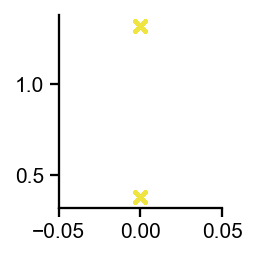

In [30]:
networks_n = 2000

hidden_dim = 64
training_steps = 5000
learning_rate = 0.05

input_dims = [8, 12]
datasets = [
    partial(FlatHierarchy, items_n=4),
    partial(gs.datasets.TMaze, trunk_length=6, arm_length=3)
]
output_dims = [7, 2]

qs = 100

fig, ax = plt.subplots()

for (dataset, in_dim, out_dim) in zip(datasets, input_dims, output_dims):
        gs.reset()
        
        d = dataset()
        task = gs.tasks.FullBatchLearning(d)
        optimiser = gs.GradientDescent(0.)
        loss = gs.MeanSquaredError()
    
        network = gs.Network([
            gs.Linear(hidden_dim, bias=False, weight_init=gs.init.Constant(0.)),
            gs.Linear(out_dim, bias=False, weight_init=gs.init.Constant(0.))
        ])
        
        trainer = gs.Trainer(task, network, loss, optimiser)
        state, params, train, validate, test = gs.environment.assemble(trainer, network_seeds_n=networks_n)
        
        xs, ys = train.keywords["task"].keywords["dataset"].keywords["data"]
        
        u, s, vt = np.linalg.svd(1. / xs.shape[-1] * ys[0] @ xs[0].T, False)
        r, _, _ = np.linalg.svd(np.random.normal(0., 1., (hidden_dim, len(s))), False)
        
        for i in range(qs):
            q = np.random.normal(0., 1., r.T.shape)
            qinv = np.linalg.pinv(q)

            w2_ = np.tile(u @ np.diag(np.sqrt(s)) @ r.T, (networks_n, 1, 1))
            w1_ = np.tile(r @ np.diag(np.sqrt(s)) @ vt, (networks_n, 1, 1))

            w2 = np.tile(u @ np.diag(np.sqrt(s)) @ q, (networks_n, 1, 1))
            w1 = np.tile(qinv @ np.diag(np.sqrt(s)) @ vt, (networks_n, 1, 1))

            dist = np.linalg.norm((w2_[0] @ w1_[0]) - (w2[0] @ w1[0]), ord="fro")
            
            xi_1 = np.random.normal(0., std, w1.shape)
            xi_2 = np.random.normal(0., std, w2.shape)
            params["network"]["layer-0"]["w"] = w1 # + xi_1
            params["network"]["layer-1"]["w"] = w2 # + xi_2
            
            ax.scatter(0., np.mean(train(state, params)[2]), c=colors[3], marker="x")

In [25]:
(w2_ @ w1_).shape

(2000, 7, 4)

In [23]:
w2_.shape

(2000, 7, 64)

In [24]:
w1_.shape

(2000, 64, 4)

In [ ]:
np.random.seed(1)

networks_n = 2000

items_n = 3
in_dim = 5
hidden_dim = 7
out_dim = 10

learning_rate = 0.05

gs.reset()

dataset = gs.datasets.TeacherStudent(items_n, items_n, items_n, gs.TeacherNetwork([
    gs.InputLayer(in_dim),
    gs.Linear(hidden_dim, bias=False, weight_init=gs.init.Normal(std=np.sqrt(1. / in_dim))),
    gs.Linear(out_dim, bias=False, weight_init=gs.init.Normal(std=np.sqrt(1. / hidden_dim)))
]), pre=[gs.datasets.Orthonormal()])

task = gs.tasks.FullBatchLearning(dataset)
optimiser = gs.GradientDescent(learning_rate)
loss = gs.MeanSquaredError()

network = gs.Network([
    gs.Linear(hidden_dim, bias=False, weight_init=gs.init.Constant(0.)),
    gs.Linear(out_dim, bias=False, weight_init=gs.init.Constant(0.))
])

trainer = gs.Trainer(task, network, loss, optimiser)
state, params, train, validate, test = gs.environment.assemble(trainer, network_seeds_n=networks_n)

xs, ys = train.keywords["task"].keywords["dataset"].keywords["data"]

u, s, vt = np.linalg.svd(1. / items_n * ys[0] @ xs[0].T, False)
r, _, _ = np.linalg.svd(np.random.normal(0., 1., (hidden_dim, len(s))), False)

w2 = np.tile(u @ np.diag(np.sqrt(s)) @ r.T, (networks_n, 1, 1))
w1 = np.tile(r @ np.diag(np.sqrt(s)) @ vt, (networks_n, 1, 1))

fig, ax = plt.subplots()

for std in np.linspace(0., .05, 6):
    xi_1 = np.random.normal(0., std, w1.shape)
    xi_2 = np.random.normal(0., std, w2.shape)
    params["network"]["layer-0"]["w"] = w1 + xi_1
    params["network"]["layer-1"]["w"] = w2 + xi_2

    ax.scatter(std, np.mean(train(state, params)[2]), c=colors[3], marker="x")

ax.set_xlabel("$\\sigma_\\xi$")
ax.set_ylabel("Loss")

w1 = w1[0]
w2 = w2[0]

losses = []
for std in np.linspace(0., .05, 100):
    c = items_n * hidden_dim * std**2 * out_dim * std**2
    loss = items_n * std**2 * np.trace(w2.T @ w2) + out_dim * std**2 * np.trace(w1.T @ w1) + c
    losses.append(0.5 * loss)

ax.plot(np.linspace(0., 0.05, 100), losses, c=colors[3], alpha=0.5, linestyle="--")
ax.set_xlim(-0.005, 0.055)

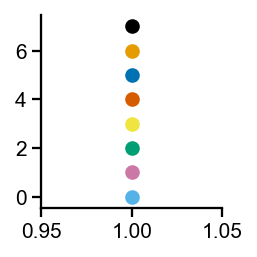

In [7]:
fig, ax = plt.subplots()
for i in range(8):
    ax.scatter(1, i)

Text(0.5, 1.0, 'Lazy')

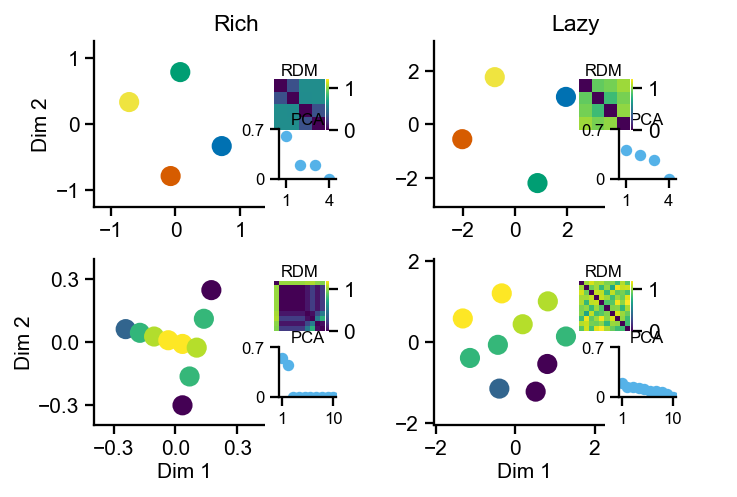

In [278]:
fig, axs = plt.subplots(2, 2, figsize=(1.6 * 3, 1.6 * 2))
axs = axs.flatten()

for i, (ax, (x, y)) in enumerate(zip(axs, mdss)):
    if i == 0:
        color = colors[2:6]
    if i == 2:
        color = np.cos(np.sqrt(x**2 + y**2))
    
    ax.scatter(x, y, c=color, s=75)
    
    lim = np.max(mdss[i]) * 1.6
    ax.set_xlim(-lim, lim * 2.5)
    ax.set_ylim(-lim, lim)
    
    width = lim * 2.5 - lim * 1.05
    ax.add_patch(Rectangle((lim * 1.1, -lim * 1.4), width, lim * 0.6, fc="w", zorder=4, clip_on=False))
    
    ins = ax.inset_axes([0.65, 0.62, 0.3, 0.3])
    cbar = ins.matshow(1. - np.corrcoef(hs[i][0].T), vmin=0., vmax=1.2)
    divider = make_axes_locatable(ins)
    cax = divider.new_horizontal(size="5%", pad=0.01, pack_start=False)
    fig.add_axes(cax)
    
    cbar = fig.colorbar(cbar, cax=cax)
    cbar.outline.set_visible(False)
    #cbar.ax.set_yticks([0., 1.])
    #cbar.ax.set_yticklabels([0, 1], fontsize=8)
    #cbar.ax.tick_params(axis='y', which='major', pad=-3)
    #cbar.ax.yaxis.set_ticks_position('none') 
    
    ins.set_xticks([])
    ins.set_yticks([])
    ins.set_title("RDM", fontsize=8, pad=2)
    ins.spines[['left', 'bottom']].set_visible(False)
    
    ins = ax.inset_axes([0.65, 0.17, 0.2, 0.3])
    lmd = PCA().fit(hs[i][0].T).explained_variance_ratio_
    ins.scatter(range(len(lmd)), lmd, s=20)
    ins.set_xlim(-0.5, len(lmd) - 0.5)
    ins.set_ylim(0., 0.7)
    ins.set_xticks([0, len(lmd)-1])
    ins.set_xticklabels([1, len(lmd)], fontsize=8)
    ins.set_yticks([0, 0.7])
    ins.set_yticklabels([0, 0.7], fontsize=8)
    ins.set_title("PCA", fontsize=8, pad=2)
    
    if i == 0:
        lim = 1
    elif i == 1:
        lim = 2
    elif i == 2:
        lim = 0.3
    else:
        lim = 2
        
    
    ax.set_xticks([-lim, 0, lim])
    ax.set_yticks([-lim, 0, lim])
    
    if i // 2 == 1:
        ax.set_xlabel("Dim 1                  ")
    if i % 2 == 0:
        ax.set_ylabel("Dim 2")

axs[0].set_title("Rich")
axs[1].set_title("Lazy")

In [163]:
t = [1,2,3,4]
t[1::2]

[2, 4]

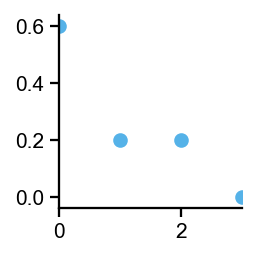

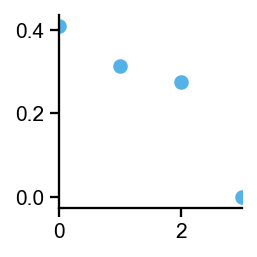

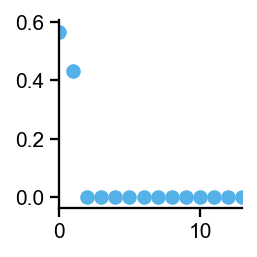

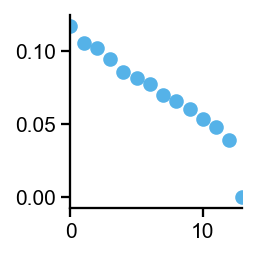

In [290]:
from sklearn.decomposition import PCA

for i in range(4):
    lmd = PCA().fit(hs[i][0].T).explained_variance_ratio_
    fig, ax = plt.subplots()
    ax.scatter(range(len(lmd)), lmd)
    

In [242]:
np.linalg.matrix_rank(np.round(hs[3][0].T, 1))

18

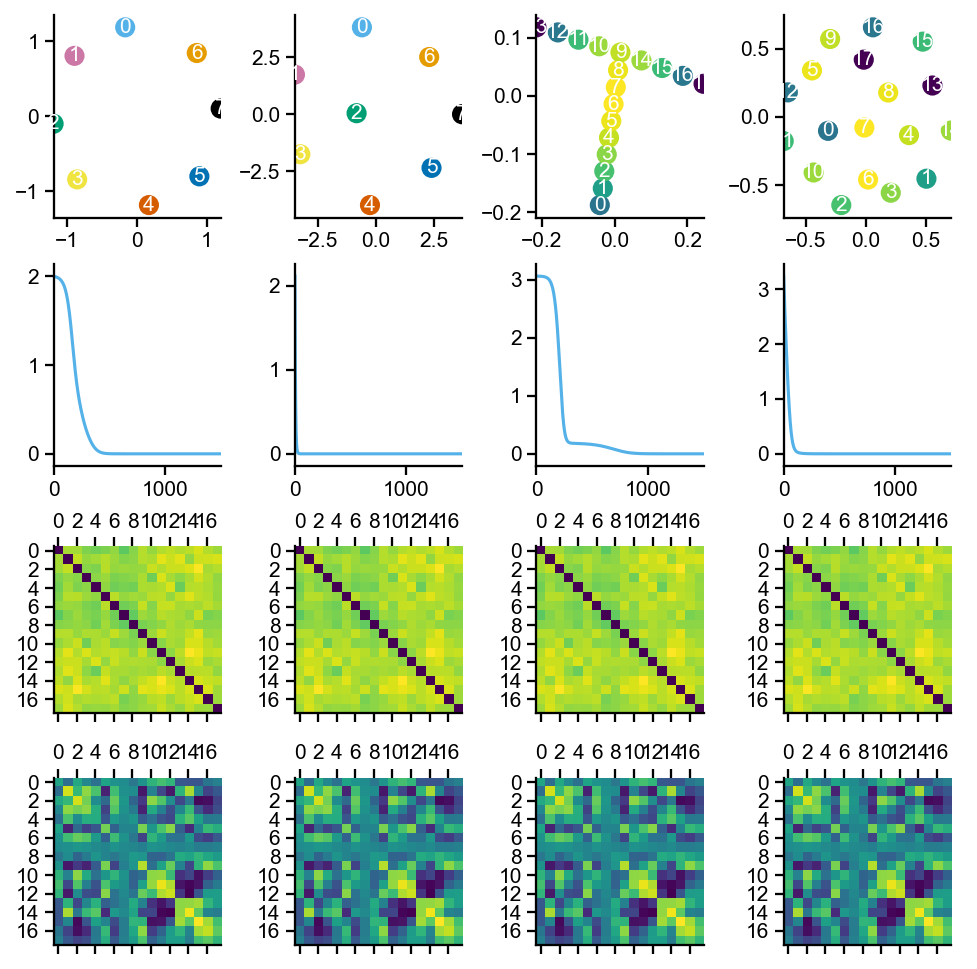

In [198]:
fig, axs = plt.subplots(2, 2, figsize=(1.6 * 4, 1.6 * 4))

for i, (x, y) in enumerate(mdss):
    items_n = input_dims[i // 2]
    
    if i == 0:
        color = colors
    if i == 2:
        color = np.cos(np.sqrt(x**2 + y**2))
    
    axs[0, i].scatter(x, y, c=color, s=75)
    
    
    
    for j in range(items_n):
        axs[0, i].text(x[j], y[j], j, ha="center", va="center", color="white")
    
    #axs[0, i].set_xlim(-1.2, 1.2)
    #axs[0, i].set_ylim(-1.2, 1.2)
    
    axs[1, i].plot(all_losses[i])
    axs[2, i].matshow(eucl)
    axs[3, i].matshow(h_transformed @ h_transformed.T)

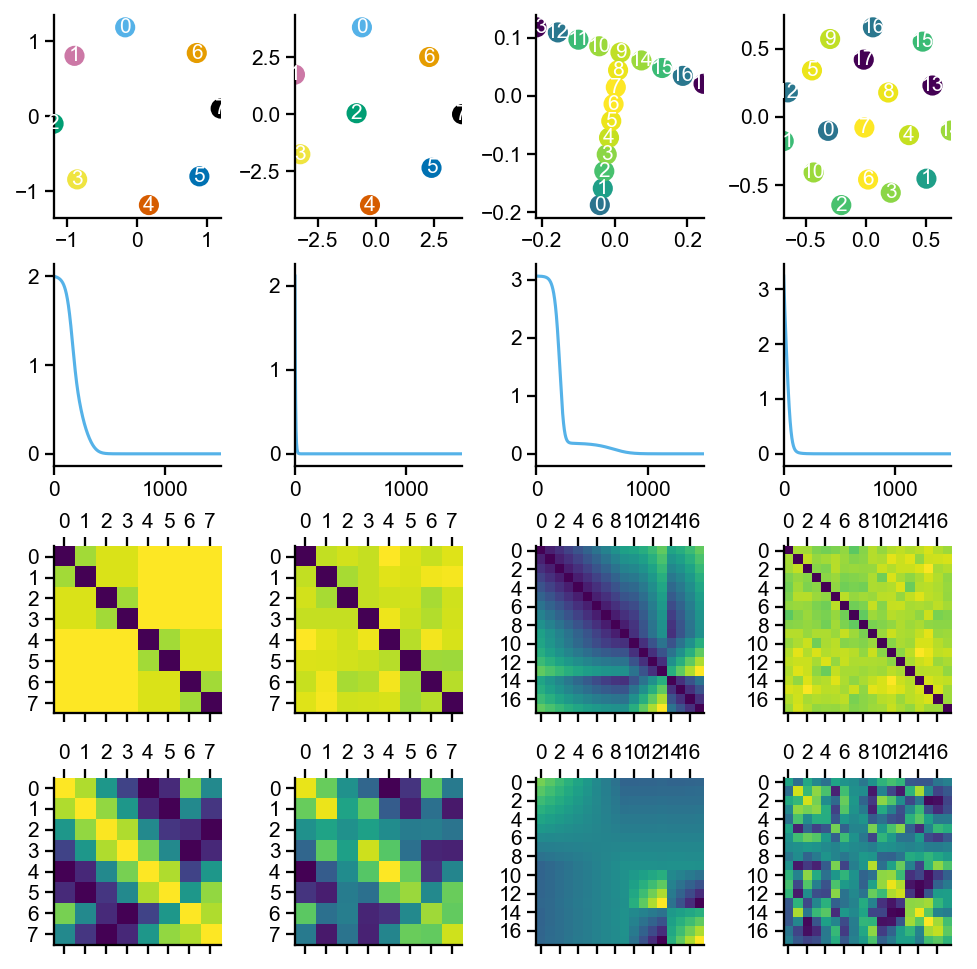

In [195]:
fig, axs = plt.subplots(4, 4, figsize=(1.6 * 4, 1.6 * 4))

for i in range(4):
    items_n = input_dims[i // 2]
    
    eucl = np.sqrt(((hs[i][0].T[:,None,:] - hs[i][0].T)**2).sum(axis=2))
    mds_transform = MDS(n_components=2, normalized_stress="auto", random_state=1, n_init=20, dissimilarity="precomputed", eps=1e-6)
    h_transformed = mds_transform.fit_transform(eucl)
    x, y = h_transformed.T
    
    if i == 0:
        color = colors
    if i == 2:
        color = np.cos(np.sqrt(x**2 + y**2))
    
    axs[0, i].scatter(x, y, c=color, s=75)
    
    
    
    for j in range(items_n):
        axs[0, i].text(x[j], y[j], j, ha="center", va="center", color="white")
    
    #axs[0, i].set_xlim(-1.2, 1.2)
    #axs[0, i].set_ylim(-1.2, 1.2)
    
    axs[1, i].plot(all_losses[i])
    axs[2, i].matshow(eucl)
    axs[3, i].matshow(h_transformed @ h_transformed.T)

In [ ]:
fig, ax = plt.subplots()
ax.matshow()

In [137]:
hs[2][0].T[0, :]

Array([ 0.00749409, -0.00540778, -0.00471077, -0.005995  , -0.00612246,
        0.00671512,  0.00251899,  0.00642336], dtype=float32)

In [87]:
np.max(rdm)

0.0009738765499034243

In [97]:
print(np.round(rdm, 3))

[[ 1.    -0.03  -0.01   0.003  0.009  0.008 -0.006  0.008 -0.008 -0.011
  -0.005 -0.01  -0.015 -0.012 -0.007 -0.01  -0.006 -0.005]
 [-0.03   1.     0.77   0.814  0.817  0.819  0.825  0.829  0.828  0.827
   0.808  0.75   0.684  0.61   0.814  0.758  0.69   0.618]
 [-0.01   0.77   1.     0.93   0.94   0.936  0.942  0.942  0.943  0.945
   0.919  0.863  0.784  0.703  0.919  0.86   0.79   0.709]
 [ 0.003  0.814  0.93   1.     0.966  0.97   0.974  0.975  0.975  0.975
   0.955  0.891  0.813  0.732  0.953  0.891  0.814  0.732]
 [ 0.009  0.817  0.94   0.966  1.     0.979  0.984  0.984  0.985  0.984
   0.961  0.901  0.819  0.739  0.961  0.901  0.822  0.74 ]
 [ 0.008  0.819  0.936  0.97   0.979  1.     0.984  0.987  0.987  0.989
   0.965  0.904  0.824  0.739  0.964  0.905  0.825  0.743]
 [-0.006  0.825  0.942  0.974  0.984  0.984  1.     0.991  0.991  0.99
   0.969  0.906  0.825  0.742  0.968  0.908  0.828  0.745]
 [ 0.008  0.829  0.942  0.975  0.984  0.987  0.991  1.     0.994  0.993
   0.97   0.

In [61]:
hs[2][0, 1, :] @ hs[2][0, 4, :]

Array(0.00324887, dtype=float32)

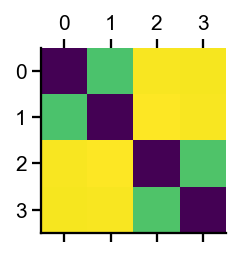

In [41]:
fig, ax = plt.subplots()
ax.matshow()

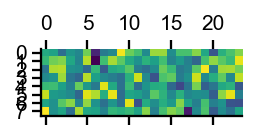

In [34]:
fig, ax = plt.subplots()
ax.matshow()

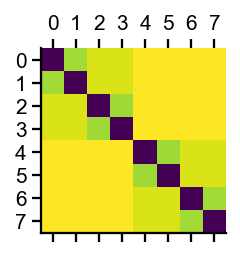

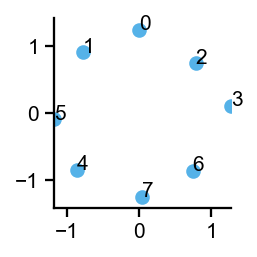

In [10]:
X = hs[0][0].T

dist = np.sqrt(((X[:,None,:] - X)**2).sum(axis=2))

# dist = (X @ X.T) - np.identity(8)*1.2

fig, ax = plt.subplots()
ax.matshow(dist)

mds_transform = MDS(n_components=2, normalized_stress="auto", n_init=300, random_state=1)
h_transformed = mds_transform.fit_transform(X)
x, y = h_transformed.T

fig, ax = plt.subplots()
ax.scatter(x, y)

for j in range(8):
    ax.text(x[j], y[j], j)

lim = 0.13
#ax.set_xlim(-lim, lim)
#ax.set_ylim(-lim, lim)

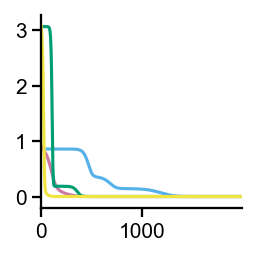

In [31]:
fig, ax = plt.subplots()
for i in range(4):
    ax.plot(all_losses[i])

In [32]:
hs[0].shape

(1, 12, 4)

(1, 7, 4)


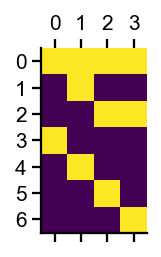

In [7]:
x, y = FlatHierarchy.training_data(None, 4)
print(y.shape)
fig, ax = plt.subplots()
ax.matshow(y[0])



In [ ]:
Smells
Valence
Stimulus
Plastic
Floral
Fresh
Spicy

-> Smells
Glove
Nerol
Octanal
Anisol

(2, 16)


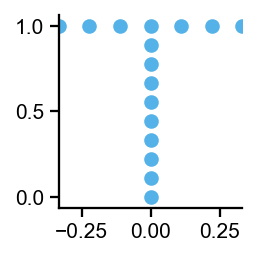

In [7]:
import jax

x, y = gs.datasets.TMaze.training_data(jax.random.PRNGKey(1), 10, 3)

print(y.shape)

fig, ax = plt.subplots()
ax.scatter(y[0], y[1])

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.11111111  0.22222222
   0.33333333  0.44444444  0.55555556 -0.11111111 -0.22222222 -0.33333333
  -0.44444444 -0.55555556]
 [ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
   0.66666667  0.77777778  0.88888889  1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.        ]]
[-1.11022302e-17  7.50000000e-01]


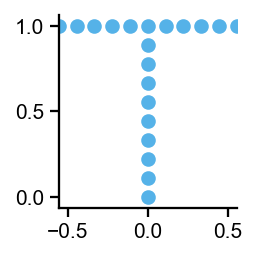

In [27]:
trunk_length = 10
arm_length = 5
trunk = np.stack([np.zeros(trunk_length), np.arange(trunk_length)])
arm_1 = np.stack([np.arange(1, arm_length + 1), np.ones(arm_length) * (trunk_length - 1)])
arm_2 = np.stack([-np.arange(1, arm_length + 1), np.ones(arm_length) * (trunk_length - 1)])

t = np.hstack([trunk, arm_1, arm_2])
t /= np.max(t)
print(t)

print(np.mean(t, axis=1))



fig, ax = plt.subplots()
ax.scatter(t[0], t[1])